In [64]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [65]:
#read the data
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [66]:
#Describe the data
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

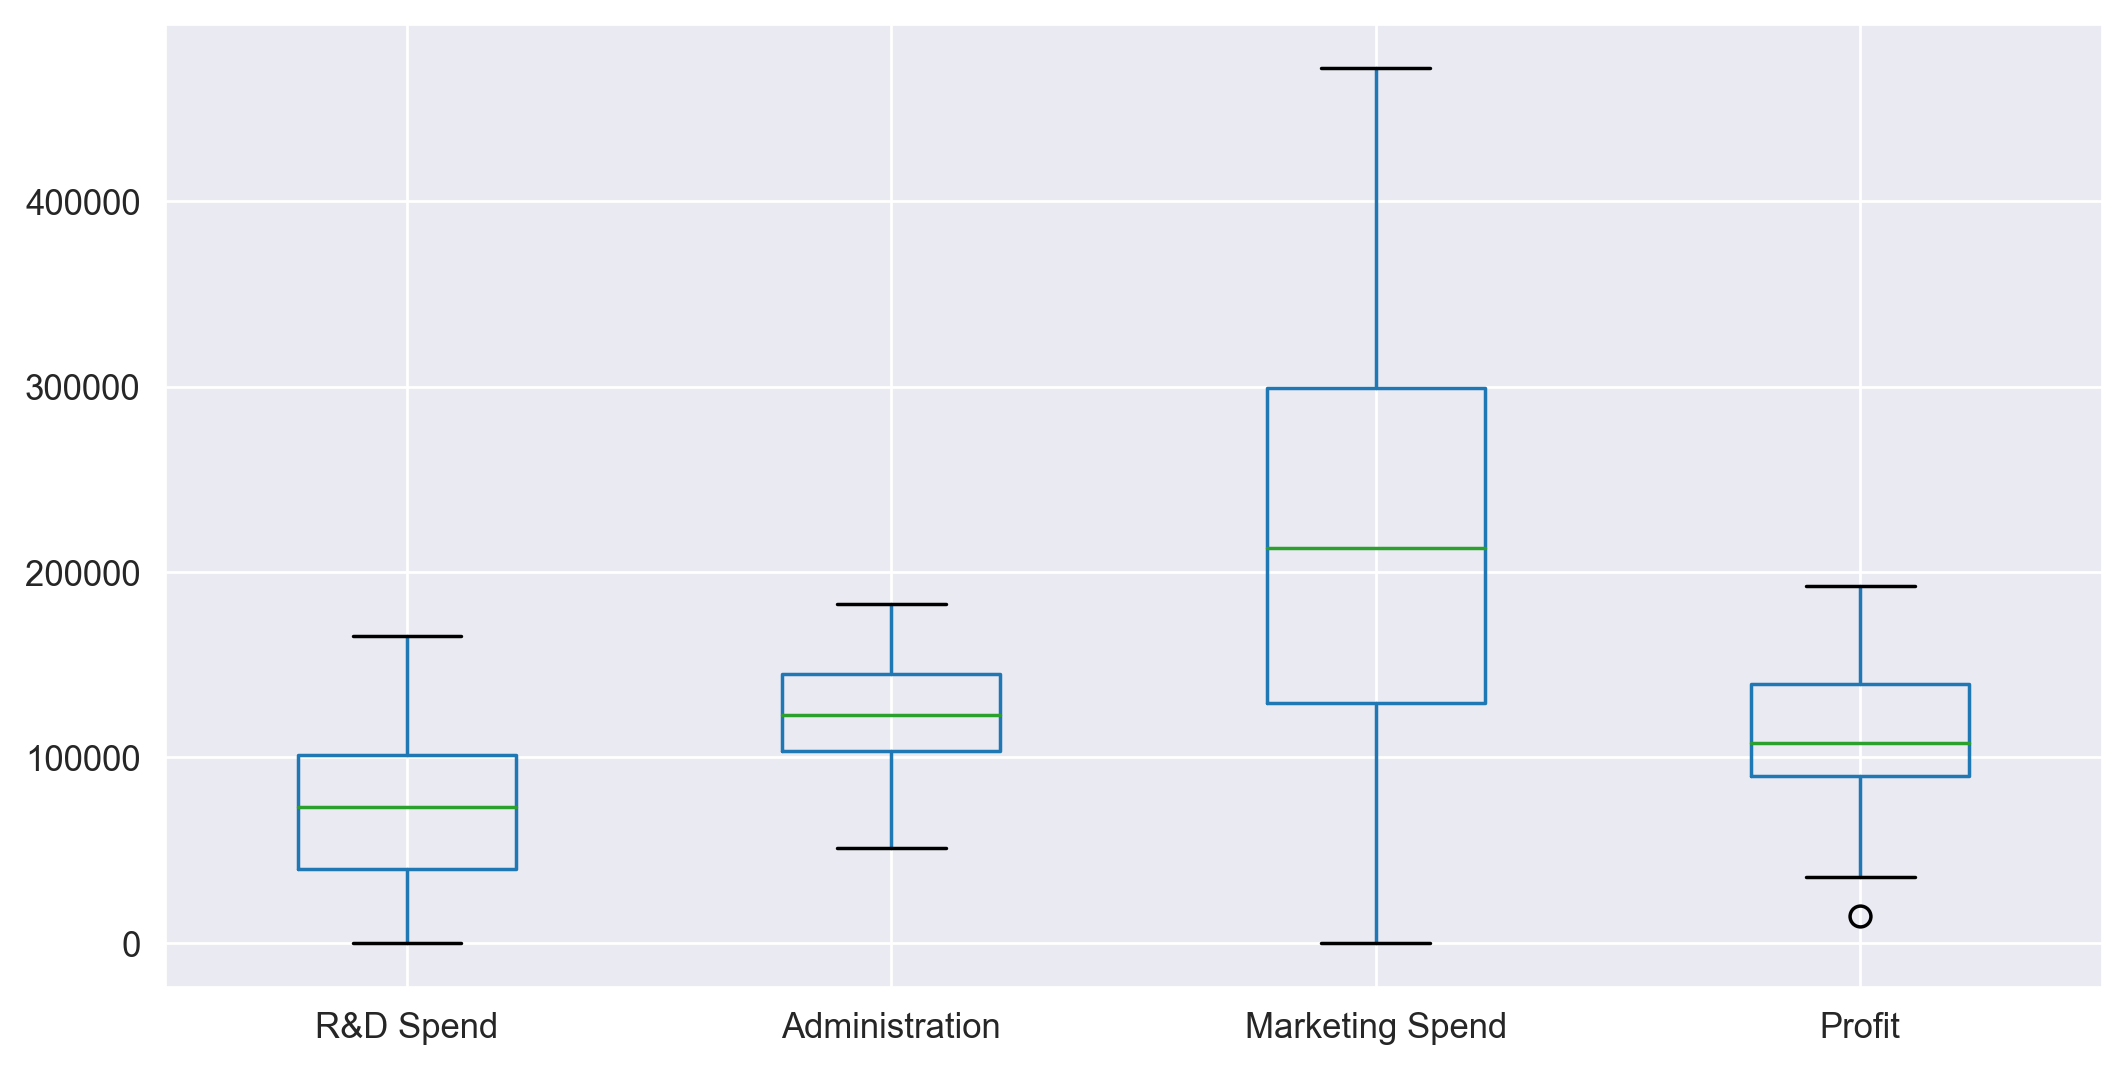

In [67]:
df.boxplot()

<AxesSubplot:>

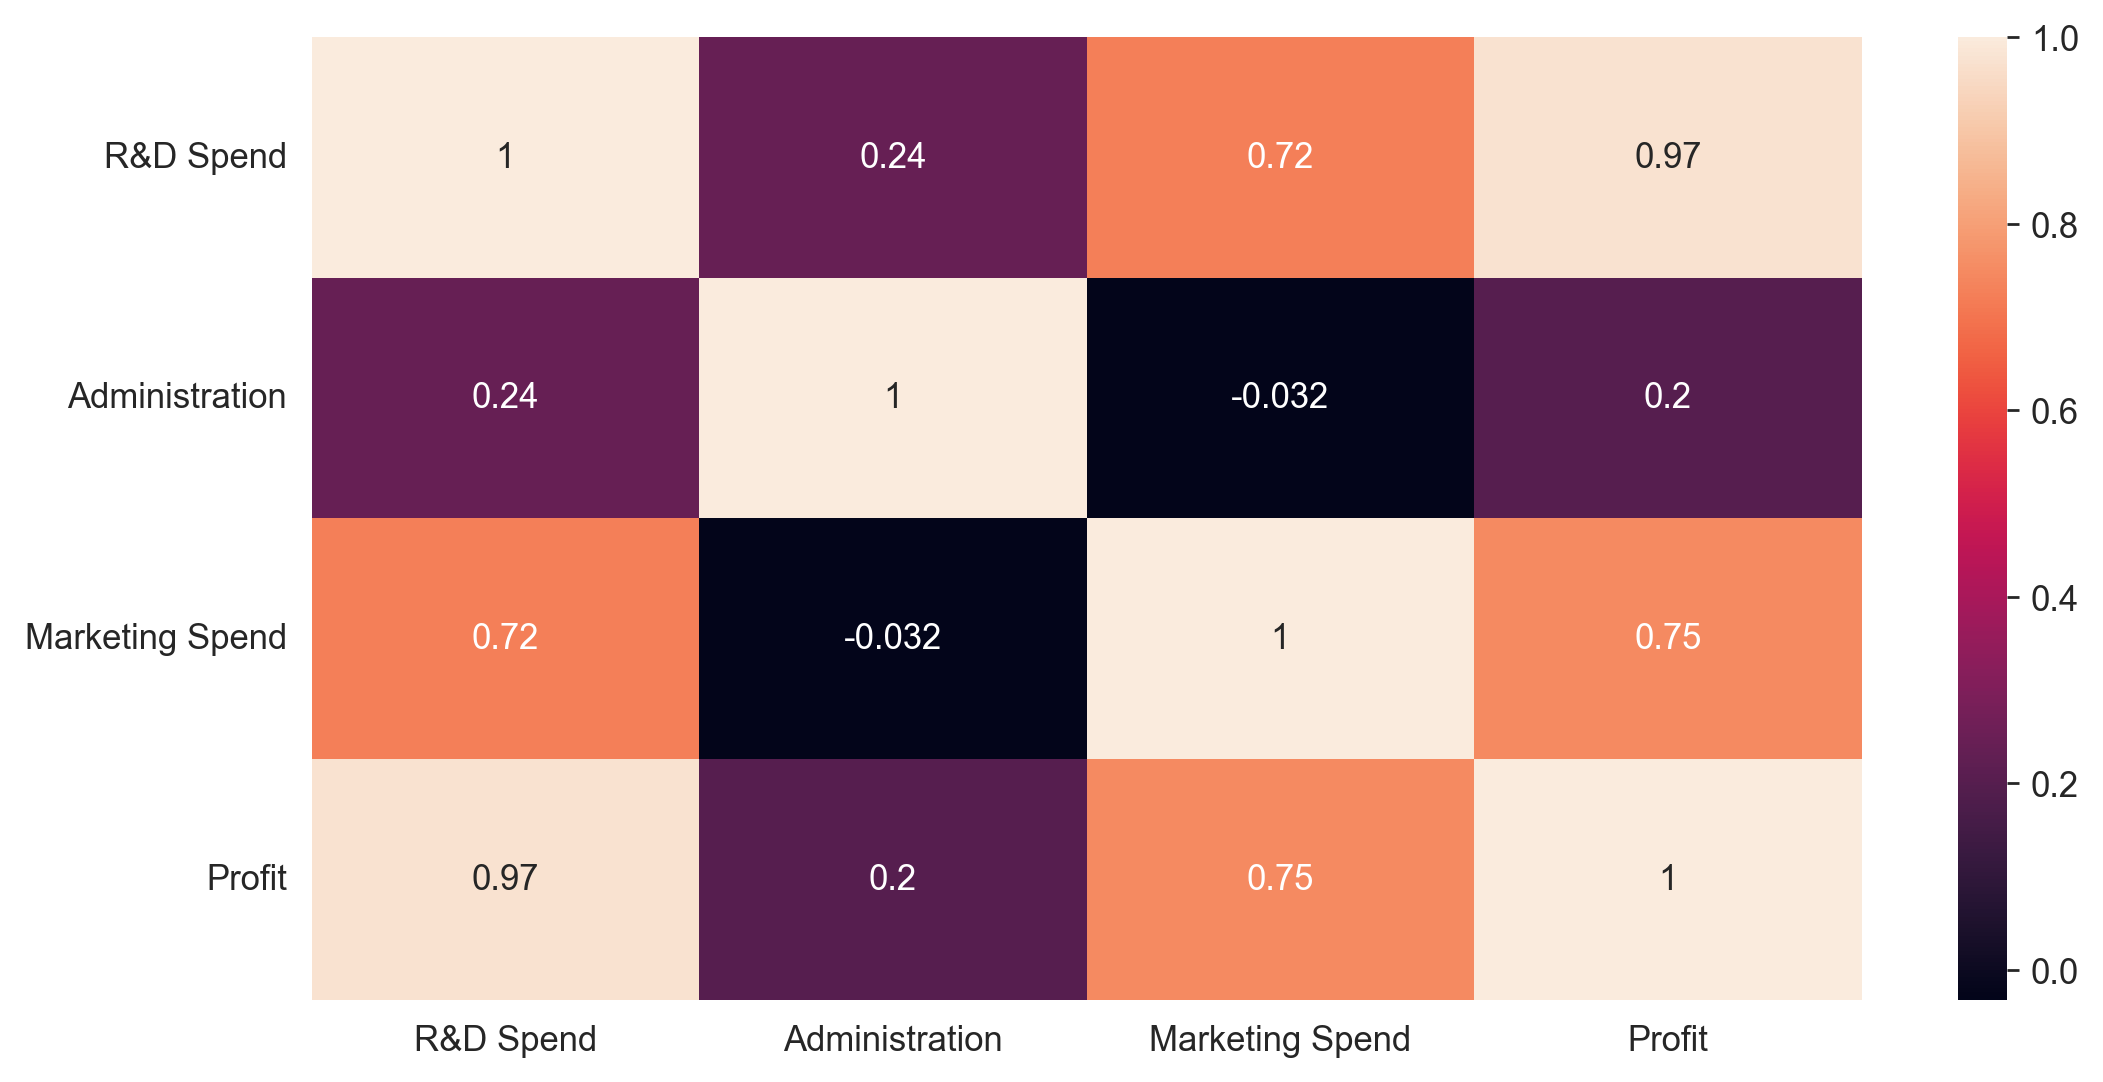

In [68]:
sns.heatmap(df.corr(), annot=True)

As we can see from above diagram, the profit column contains outlier in lower extreme

<AxesSubplot:xlabel='Profit'>

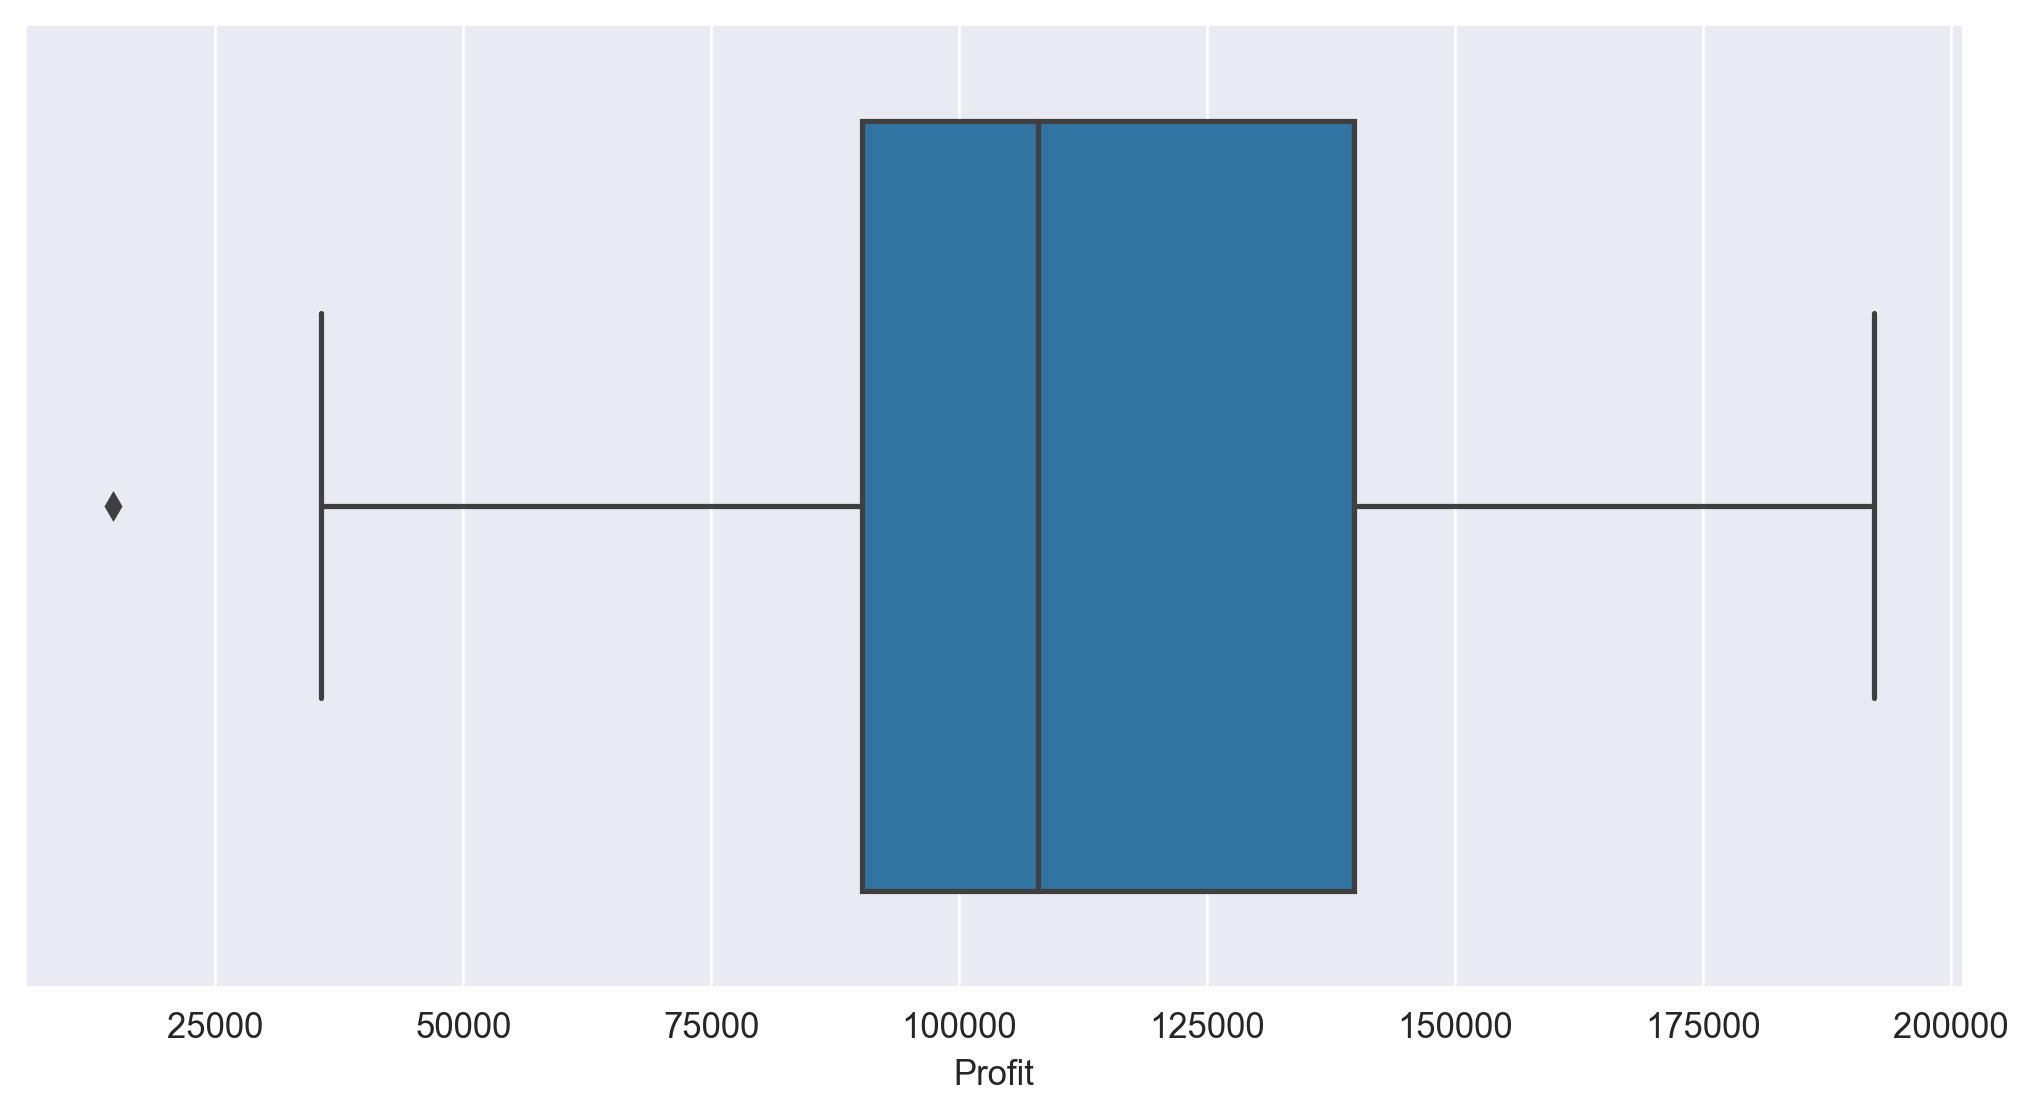

In [69]:
sns.boxplot(df['Profit'])

In [70]:
#using Pandas filtering to find out outlier data point
df[df['Profit']<25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [71]:
#Only one outlier data point present we can drop the column
df.drop(49,inplace=True)

In [72]:
#Print duplicate
df.duplicated().sum()

0

In [73]:
#Rename the columns
df.rename(columns={'R&D Spend':'RDSpend','Marketing Spend':'MarketSpend'},inplace=True)
# using label.encoding for State 
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["State"]=lb.fit_transform(df["State"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         49 non-null     float64
 1   Administration  49 non-null     float64
 2   MarketSpend     49 non-null     float64
 3   State           49 non-null     int32  
 4   Profit          49 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.8 KB


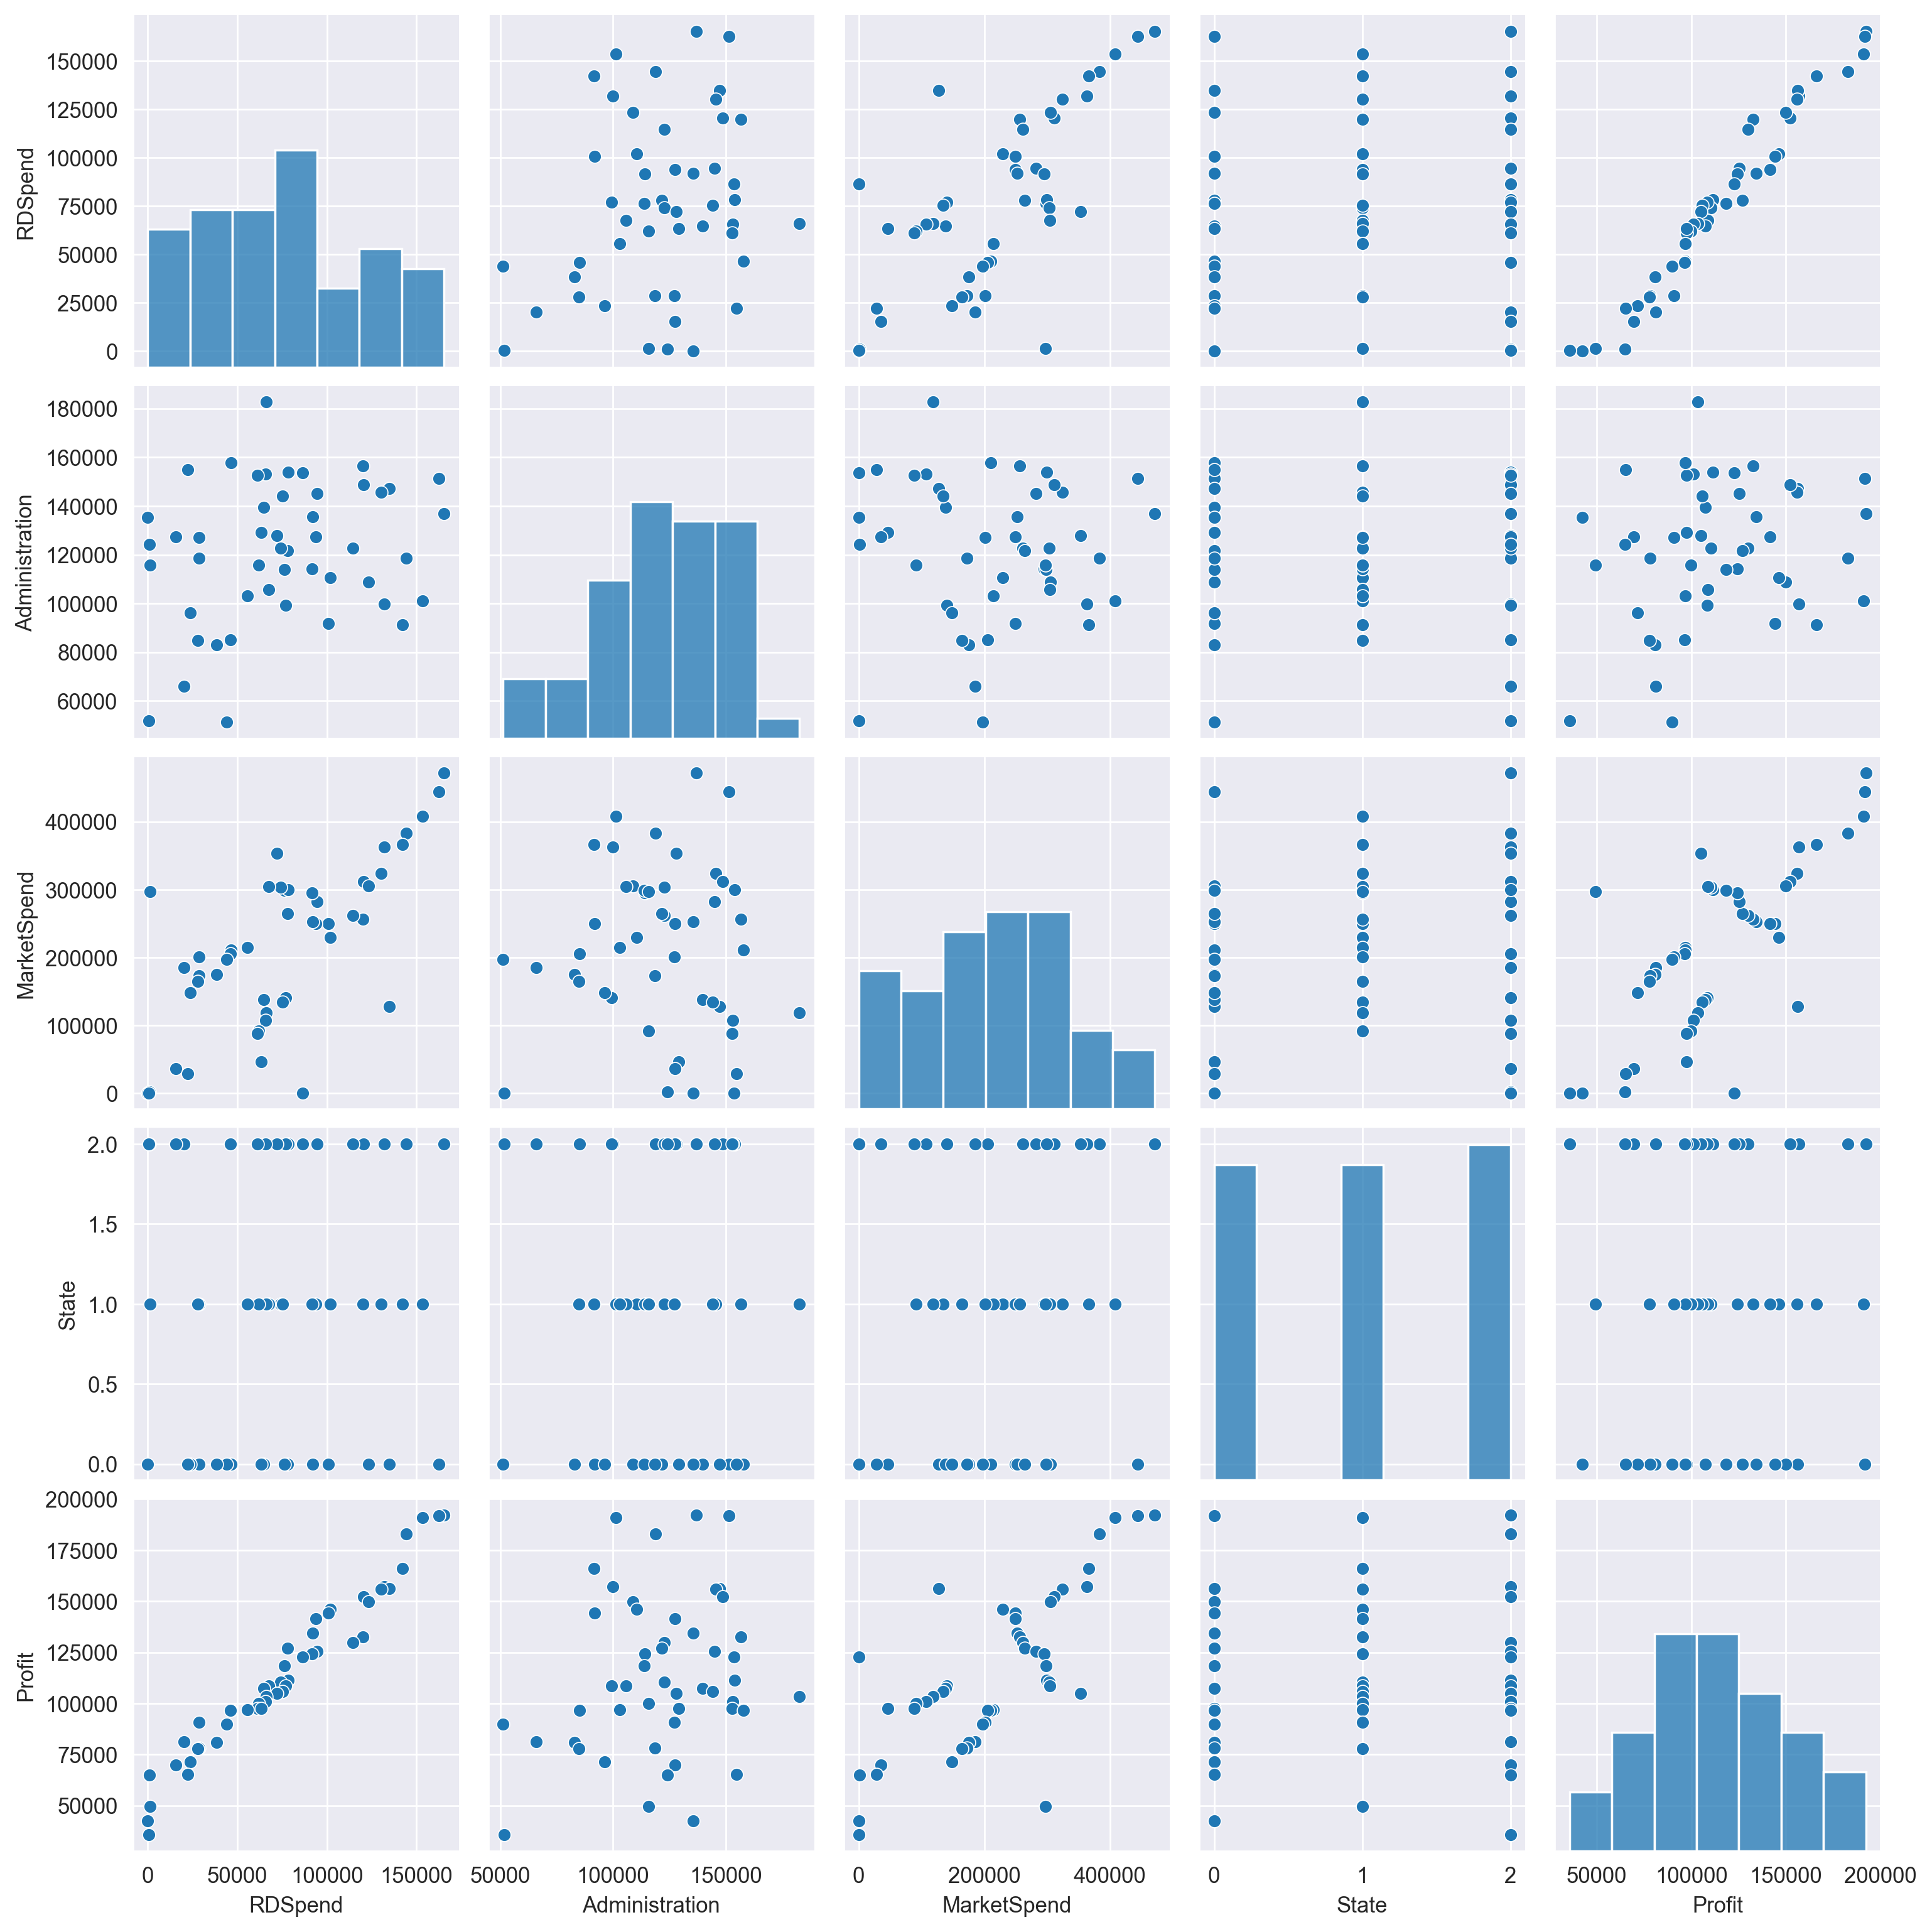

In [74]:
sns.pairplot(df)

In [75]:
#Scale the data using Standard scaler
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
df[['RDSpend','Administration','MarketSpend','State','Profit']] = stdscaler.fit_transform(df)

In [76]:
df.head()

,RDSpend,Administration,MarketSpend,State,Profit
0,2.018325,0.552080,2.146120,1.194045,2.071556
1,1.956704,1.069017,1.913596,-1.243796,2.059122
2,1.751650,-0.724297,1.613709,-0.024876,2.039490
3,1.548545,-0.098597,1.407457,1.194045,1.823808
4,1.497818,-1.072513,1.265442,-0.024876,1.381401


In [77]:
# initialisisng x and y
y=df.iloc[:,4]
x=df.iloc[:,:-1]

# splitting dataset into test and train
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

# object creation and train the model
from sklearn.linear_model import LinearRegression

startModel=LinearRegression()
startModel.fit(xtrain,ytrain)

# Predicting the label

ytrainPredict=startModel.predict(xtrain)
ytestPredict=startModel.predict(xtest)

# Evaluating the output 
from sklearn.metrics import r2_score,mean_squared_error

r2scoretrain=r2_score(ytrain,ytrainPredict)
r2scoretest=r2_score(ytest,ytestPredict)

print("Coefficient of determination r2Score-train =",r2scoretrain)
print("Coefficient of determination r2Score-test =",r2scoretest)

meansquarederrortrain=mean_squared_error(ytrain,ytrainPredict)
meansquarederrortest=mean_squared_error(ytest,ytestPredict)

print("Mean Squared Error for train =",meansquarederrortrain)
print("Mean Squared Error for test =",meansquarederrortest)

Coefficient of determination r2Score-train = 0.9603964977341733
Coefficient of determination r2Score-test = 0.9707216648197781
Mean Squared Error for train = 0.04380718047034147
Mean Squared Error for test = 0.01715601656253484
